In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [2]:
from langchain_groq import ChatGroq
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
model = ChatGroq(model="qwen/qwen3-32b")
model

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x0000019804F82C50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000019804F82B60>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [3]:
from langchain_tavily import TavilySearch

tavily_search_tool = TavilySearch(
    max_results=5,
    topic="general"
)
tavily_search_tool.invoke("what is the current AI news?")

{'query': 'what is the current AI news?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.artificialintelligence-news.com/',
   'title': 'AI News | Latest News | Insights Powering AI-Driven Business Growth',
   'content': 'Gartner Data & Analytics Summit unveils expanded AI agenda for 2026 · Thailand becomes one of the first in Asia to get the Sora app · Malaysia launches Ryt Bank',
   'score': 0.6466616,
   'raw_content': None},
  {'url': 'https://www.reuters.com/technology/artificial-intelligence/',
   'title': 'AI News | Latest Headlines and Developments | Reuters',
   'content': 'Bill Gates cancels keynote address at India AI summit · France and India will help build the future of AI, says Macron · Tata partners with OpenAI to build',
   'score': 0.62495816,
   'raw_content': None},
  {'url': 'https://www.nbcnews.com/artificial-intelligence',
   'title': 'Artificial intelligence - NBC News',
   'content': "The latest news and top stor

In [10]:
tool

<function langchain_core.tools.convert.tool(name_or_callable: str | collections.abc.Callable | None = None, runnable: langchain_core.runnables.base.Runnable | None = None, *args: Any, description: str | None = None, return_direct: bool = False, args_schema: type[pydantic.main.BaseModel] | dict[str, typing.Any] | None = None, infer_schema: bool = True, response_format: Literal['content', 'content_and_artifact'] = 'content', parse_docstring: bool = False, error_on_invalid_docstring: bool = True, extras: dict[str, typing.Any] | None = None) -> langchain_core.tools.base.BaseTool | collections.abc.Callable[[collections.abc.Callable | langchain_core.runnables.base.Runnable], langchain_core.tools.base.BaseTool]>

In [7]:
from langchain.tools import tool

@tool("calculator", description="Performs arithmetic calculations. Use this for any math problems.")
def calc(expression: str) -> str:
    """Evaluate mathematical expressions."""
    return str(eval(expression))

In [8]:
tool

<function langchain_core.tools.convert.tool(name_or_callable: str | collections.abc.Callable | None = None, runnable: langchain_core.runnables.base.Runnable | None = None, *args: Any, description: str | None = None, return_direct: bool = False, args_schema: type[pydantic.main.BaseModel] | dict[str, typing.Any] | None = None, infer_schema: bool = True, response_format: Literal['content', 'content_and_artifact'] = 'content', parse_docstring: bool = False, error_on_invalid_docstring: bool = True, extras: dict[str, typing.Any] | None = None) -> langchain_core.tools.base.BaseTool | collections.abc.Callable[[collections.abc.Callable | langchain_core.runnables.base.Runnable], langchain_core.tools.base.BaseTool]>

In [9]:
from langchain.agents import create_agent

agent = create_agent(
    model=model,
    tools=[tavily_search_tool, calc],
)

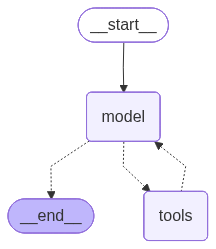

In [11]:
agent

In [12]:
user_input = "What is the current AI news and what is 123 * 456?"

for step in agent.stream(
    {"messages": user_input},
    stream_mode="values"
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What is the current AI news and what is 123 * 456?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (abykpr1zg)
 Call ID: abykpr1zg
  Args:
    include_images: False
    query: latest AI news
    time_range: day
    topic: general
  calculator (sf0vyd68n)
 Call ID: sf0vyd68n
  Args:
    expression: 123 * 456
================================= Tool Message =================================
Name: calculator

56088
================================== Ai Message ==================================

Here's the information you requested:

**Current AI News Highlights:**
1. **Gartner's Expanded AI Agenda (2026)** - New focus on data analytics and AI integration at their upcoming summit.
2. **OpenAI vs. Anthropic** - Rivalry showcased at AI summit; Google released Gemini 3.1 Pro model.
3. **Nvidia's Investment** - Plans to invest $30B in OpenAI's next fundi

In [13]:
agent.invoke({'messages':"What is the current news on Anthropic and what is 123 / 23?"})['messages'][-1].pretty_print()

================================== Ai Message ==================================

**Current News on Anthropic:**  
Anthropic is currently in a contentious dispute with the U.S. Pentagon over the use of its AI technology. Key points include:  
1. **Conflict Over AI Use**: Anthropic has strict limits on fully autonomous weapons and mass domestic surveillance, while the Pentagon argues these restrictions hinder military operations.  
2. **Potential Supply Chain Risk**: The Pentagon is considering cutting business ties with Anthropic and labeling its AI a "supply chain risk," which would complicate contracts for companies using Anthropic’s models.  
3. **Political Tensions**: Anthropic’s CEO, Dario Amodei, criticized the Trump administration’s Venezuela raid and supports AI regulations, clashing with defense priorities.  
4. **Classified Contracts**: Despite tensions, Anthropic’s Claude models are used on classified Pentagon networks, making it a key player in defense AI.  

**Math Calcula

In [14]:
## @tool decorator

from langchain_core.tools import tool

@tool
def division(a:int,b:int)->int:
    """Divide 2 number"""
    return a/b

In [15]:
print(division.name)
print(division.description)
print(division.args)


division
Divide 2 number
{'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}


In [16]:
## async implementation

from langchain_core.tools import tool


@tool
async def amultiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

In [17]:
from typing import Annotated,List

@tool
def multiply_by_max(
    a: Annotated[int,"A value"],
    b:Annotated[List[int],"list of ints over which to take maximum"]
)->int:
    """Mulitply a by the maximum of b"""
    return a* max(b)
    

In [18]:
from langchain_core.tools import StructuredTool


def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b


async def amultiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

calculator=StructuredTool.from_function(func=multiply,coroutine=amultiply)

print(calculator.invoke({"a": 2, "b": 3}))
print(await calculator.ainvoke({"a": 2, "b": 5}))

6
10



## Inbuilt Tools
### wikipedia Integration

In [19]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

api_wrapper=WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max=500)
tool=WikipediaQueryRun(api_wrapper=api_wrapper)

print(tool.invoke({"query":"langchain"}))

Page: LangChain
Summary: LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.



Page: Vector database
Summary: A vector database, vector store or vector search engine is a database that stores and retrieves embeddings of data in v


In [20]:
import os
from dotenv import load_dotenv
load_dotenv()


True

In [21]:
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [22]:
from langchain_tavily import TavilySearch

tool = TavilySearch(
    max_results=5,
    topic="general",
    # include_answer=False,
    # include_raw_content=False,
    # include_images=False,
    # include_image_descriptions=False,
    # search_depth="basic",
    # time_range="day",
    # include_domains=None,
    # exclude_domains=None
)

In [23]:
tool.invoke("What is the recent ai news")

{'query': 'What is the recent ai news',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.youtube.com/@AINewsOfficial',
   'title': 'AI News - YouTube',
   'content': 'AI News delivers the latest breakthroughs in artificial intelligence, machine learning, deep learning, brain computer interface, robotics, and other future',
   'score': 0.99828595,
   'raw_content': None},
  {'url': 'https://www.wsj.com/tech/ai?gaa_at=eafs&gaa_n=AWEtsqeNSIFz22BhOmKWpdRSTQHax0flAsvJypG0ZdpeMoLm_6cHOr3HfwFi&gaa_ts=6998aad5&gaa_sig=q3M-_4POGopvsWL9iLRgxM0jc7JQ0mlRqthDE8SPt3s5TwyWlMhoebOjjM7rCR5aXATnGPggjQKXgOk7qvJUNg%3D%3D',
   'title': 'Artificial Intelligence - Latest AI News and Analysis - WSJ.com',
   'content': "Artificial Intelligence · Theft of Trade Secrets Is on the Rise—and AI Is Making It Worse · India's Reliance Industries to Invest $110 Billion in AI · Tata",
   'score': 0.99805814,
   'raw_content': None},
  {'url': 'https://www.artificialintellig

In [25]:
from langchain_community.utilities import ArxivAPIWrapper

tool=ArxivAPIWrapper()

tool.run("1706.03762")

'Published: 2023-08-02\nTitle: Attention Is All You Need\nAuthors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin\nSummary: The dominant sequence transduction models are based on complex recurrent or convolutional neural networks in an encoder-decoder configuration. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Experiments on two machine translation tasks show these models to be superior in quality while being more parallelizable and requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, including ensembles by over 2 BLEU. On the WMT 2014 English-to-French translation task, our model establishes a new 

### Call Tool With LLM Model


In [26]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=100)
wiki_tool = WikipediaQueryRun(api_wrapper=api_wrapper)

print(wiki_tool.invoke({"query": "langchain"}))

Page: LangChain
Summary: LangChain is a software framework that helps facilitate the integration of 


In [27]:
from langchain_tavily import TavilySearch

tavily_tool = TavilySearch(
    max_results=5,
    topic="general",
    # include_answer=False,
    # include_raw_content=False,
    # include_images=False,
    # include_image_descriptions=False,
    # search_depth="basic",
    # time_range="day",
    # include_domains=None,
    # exclude_domains=None
)

In [28]:
from langchain_core.tools import tool


@tool
def add(a: int, b: int) -> int:
    """Adds a and b."""
    return a + b


@tool
def multiply(a: int, b: int) -> int:
    """Multiplies a and b."""
    return a * b

In [ ]:
wiki_tool.name


'wikipedia'

In [30]:
add.name

'add'

In [31]:
multiply.name

'multiply'

In [32]:
tavily_tool.name

'tavily_search'

In [33]:
tools=[wiki_tool,add,multiply,tavily_tool]

In [34]:
tools

[WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from 'd:\\work\\Langchain-Tutorial\\.venv\\lib\\site-packages\\wikipedia\\__init__.py'>, top_k_results=1, lang='en', load_all_available_meta=False, doc_content_chars_max=100)),
 StructuredTool(name='add', description='Adds a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000001980505AB90>),
 StructuredTool(name='multiply', description='Multiplies a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000019807275120>),
 TavilySearch(max_results=5, topic='general', api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'), api_base_url=None))]

In [35]:
from langchain.chat_models import init_chat_model
llm=init_chat_model("qwen/qwen3-32b",model_provider="groq")
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x0000019806E29660>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000019806BEF7F0>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [36]:
llm_with_tool=llm.bind_tools(tools)
llm_with_tool

RunnableBinding(bound=ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x0000019806E29660>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000019806BEF7F0>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'wikipedia', 'description': 'A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'query to look up on wikipedia', 'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}, {'type': 'function

In [37]:
from langchain_core.messages import HumanMessage
query="What is 2* 3"
messages = [HumanMessage(query)]
response=llm_with_tool.invoke(query)
print(response)

content='' additional_kwargs={'reasoning_content': 'Okay, the user is asking "What is 2* 3". Let me see. The tools available include a Wikipedia wrapper, an add function, a multiply function, and a Tavily search engine. The question is a simple multiplication of 2 and 3. Since there\'s a multiply function, I should use that. The parameters for multiply are a and b, both integers. So a is 2 and b is 3. I need to call the multiply function with these values. No need for any other tools here because it\'s a straightforward math problem.\n', 'tool_calls': [{'id': 'jbxe2qzg8', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 146, 'prompt_tokens': 1937, 'total_tokens': 2083, 'completion_time': 0.235059302, 'completion_tokens_details': {'reasoning_tokens': 117}, 'prompt_time': 0.084998709, 'prompt_tokens_details': None, 'queue_time': 0.047188311, 'total_time': 0.320058011}, 'model_name': 'qwen/qwen3-3

In [38]:
response

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking "What is 2* 3". Let me see. The tools available include a Wikipedia wrapper, an add function, a multiply function, and a Tavily search engine. The question is a simple multiplication of 2 and 3. Since there\'s a multiply function, I should use that. The parameters for multiply are a and b, both integers. So a is 2 and b is 3. I need to call the multiply function with these values. No need for any other tools here because it\'s a straightforward math problem.\n', 'tool_calls': [{'id': 'jbxe2qzg8', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 146, 'prompt_tokens': 1937, 'total_tokens': 2083, 'completion_time': 0.235059302, 'completion_tokens_details': {'reasoning_tokens': 117}, 'prompt_time': 0.084998709, 'prompt_tokens_details': None, 'queue_time': 0.047188311, 'total_time': 0.320058011}, 'model_name': '

In [39]:
response.tool_calls

[{'name': 'multiply',
  'args': {'a': 2, 'b': 3},
  'id': 'jbxe2qzg8',
  'type': 'tool_call'}]

In [40]:
for tool_call in response.tool_calls:
    selected_tool = {"add": add, "multiply": multiply,"wikipedia":wiki_tool,"tavily_search":tavily_tool}[tool_call["name"].lower()]
    tool_msg = selected_tool.invoke(tool_call)
    messages.append(tool_msg)

In [41]:
messages

[HumanMessage(content='What is 2* 3', additional_kwargs={}, response_metadata={}),
 ToolMessage(content='6', name='multiply', tool_call_id='jbxe2qzg8')]

In [42]:
llm_with_tool.invoke(messages)


AIMessage(content='The result of multiplying 2 by 3 is **6**.', additional_kwargs={'reasoning_content': 'Okay, the user asked "What is 2* 3". Let me see. The tools available include a Wikipedia wrapper, add, multiply functions, and a Tavily search engine. The user is asking for a multiplication of 2 and 3. Since there\'s a multiply function, I should use that. The parameters for multiply are a and b, both integers. So, a is 2 and b is 3. I\'ll call the multiply function with these values. The response should be 6. Let me make sure there\'s no trick here, but 2 times 3 is straightforward. Yep, the tool response was 6, so I\'ll present that as the answer.\n'}, response_metadata={'token_usage': {'completion_tokens': 162, 'prompt_tokens': 1947, 'total_tokens': 2109, 'completion_time': 0.329591837, 'completion_tokens_details': {'reasoning_tokens': 143}, 'prompt_time': 0.094174546, 'prompt_tokens_details': None, 'queue_time': 0.159248843, 'total_time': 0.423766383}, 'model_name': 'qwen/qwen3

In [43]:
from langchain_core.messages import HumanMessage

query = "What is langchain and what is 5*15?"
messages = [HumanMessage(query)]

ai_msg = llm_with_tool.invoke(messages)
ai_msg

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, let\'s tackle the user\'s question: "What is langchain and what is 5*15?" \n\nFirst, I need to break down the query into parts. The user is asking two separate things here. The first part is about "langchain," which I need to explain. The second part is a simple arithmetic problem: 5 multiplied by 15.\n\nFor the first part, I should use the Wikipedia function to get information about LangChain. Since LangChain is a concept or a project, Wikipedia might have an entry explaining its purpose, features, and use cases. I\'ll need to call the Wikipedia function with the query "LangChain" to retrieve that information.\n\nThe second part is a straightforward multiplication. The user might be testing if I can handle both complex and simple questions. Since there\'s a multiply function available, I should use that. The parameters are 5 and 15, so calling multiply with a=5 and b=15 should give the correct result, which is 75.\n\

In [44]:
ai_msg.tool_calls

[{'name': 'wikipedia',
  'args': {'query': 'LangChain'},
  'id': '4mzfbrzwk',
  'type': 'tool_call'},
 {'name': 'multiply',
  'args': {'a': 5, 'b': 15},
  'id': 'fqyfbkxs0',
  'type': 'tool_call'}]

In [45]:
for tool_call in ai_msg.tool_calls:
    selected_tool = {"add": add, "multiply": multiply,"wikipedia":wiki_tool,"tavily_search":tavily_tool}[tool_call["name"].lower()]
    tool_msg = selected_tool.invoke(tool_call)
    messages.append(tool_msg)
    
messages

[HumanMessage(content='What is langchain and what is 5*15?', additional_kwargs={}, response_metadata={}),
 ToolMessage(content='Page: LangChain\nSummary: LangChain is a software framework that helps facilitate the integration of ', name='wikipedia', tool_call_id='4mzfbrzwk'),
 ToolMessage(content='75', name='multiply', tool_call_id='fqyfbkxs0')]

In [46]:
response=llm_with_tool.invoke(messages)

In [47]:
response.content

'LangChain is a software framework that helps facilitate the integration of large language models (LLMs) with external data sources, tools, and applications. It provides modularity and flexibility for developers to build end-to-end LLM-powered applications, including features for prompt management, memory, agent workflows, and more.\n\nFor the math question:  \n5 * 15 = 75.'

In [48]:
from langchain_core.messages import HumanMessage

query = "What is langchain and what is 5*15 and summarize the recent AI news ?"
messages = [HumanMessage(query)]

ai_msg = llm_with_tool.invoke(messages)
ai_msg

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, let\'s break down the user\'s query. They asked three things: what LangChain is, the result of 5 multiplied by 15, and a summary of recent AI news. \n\nFirst, for LangChain, I need to use the Wikipedia function because it\'s a general knowledge question. The user wants a definition, so the Wikipedia tool should provide an accurate explanation.\n\nNext, the math problem 5*15. That\'s straightforward multiplication. The multiply function is available, so I should call that with a=5 and b=15. No need for any other tools here.\n\nLastly, summarizing recent AI news. The Tavily Search function is suitable here since it\'s for current events. I need to set the parameters to get the latest news. The user didn\'t specify a time range, but "recent" implies maybe the last week. So, setting time_range to "week" and search_depth to "advanced" to ensure comprehensive results. Including domains might not be necessary unless the user

In [49]:
ai_msg.tool_calls

[{'name': 'wikipedia',
  'args': {'query': 'LangChain'},
  'id': '0f6ja5qmq',
  'type': 'tool_call'},
 {'name': 'multiply',
  'args': {'a': 5, 'b': 15},
  'id': 'p65av8bwq',
  'type': 'tool_call'},
 {'name': 'tavily_search',
  'args': {'query': 'recent AI news',
   'search_depth': 'advanced',
   'time_range': 'week'},
  'id': 'knfrws1bs',
  'type': 'tool_call'}]

In [50]:
for tool_call in ai_msg.tool_calls:
    selected_tool = {"add": add, "multiply": multiply,"wikipedia":wiki_tool,"tavily_search":tavily_tool}[tool_call["name"].lower()]
    tool_msg = selected_tool.invoke(tool_call)
    messages.append(tool_msg)
    
messages

[HumanMessage(content='What is langchain and what is 5*15 and summarize the recent AI news ?', additional_kwargs={}, response_metadata={}),
 ToolMessage(content='Page: LangChain\nSummary: LangChain is a software framework that helps facilitate the integration of ', name='wikipedia', tool_call_id='0f6ja5qmq'),
 ToolMessage(content='75', name='multiply', tool_call_id='p65av8bwq'),
 ToolMessage(content='{"query": "recent AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.artificialintelligence-news.com/", "title": "AI News | Latest News | Insights Powering AI-Driven Business ...", "content": "# Gartner Data & Analytics Summit unveils expanded AI agenda for 2026\\n\\n#### Applications\\n\\n### Thailand becomes one of the first in Asia to get the Sora app\\n\\nEntertainment & Media\\n\\nOctober 30, 2025\\n\\n### Malaysia launches Ryt Bank, its first AI-powered bank\\n\\nFinance AI\\n\\nAugust 26, 2025\\n\\n### Google’s Veo 3 AI video creati

In [51]:
response=llm_with_tool.invoke(messages)
response.content

'1. **What is LangChain?**  \n   LangChain is a software framework designed to facilitate the integration of language models into applications. It provides tools for managing prompts, handling memory, and connecting to external data sources, enabling developers to build scalable and maintainable AI-driven applications.\n\n2. **5 * 15 = 75**  \n   The product of 5 and 15 is **75**.\n\n3. **Recent AI News Summary**  \n   - **Google\'s AI Expansion**: Google launched the *AI Impact Summit 2026*, focusing on global partnerships and innovations to democratize AI benefits. They also announced a $30 million "AI for Science" challenge to support AI-driven scientific research.  \n   - **Regional Developments**: Thailand and Malaysia introduced AI-powered services (e.g., Sora app, Ryt Bank), while the U.S. and Japan announced a sweeping AI and tech collaboration.  \n   - **Technological Advances**: Google’s Veo 3 AI video tools became widely available, and quantum AI was highlighted as a "transf